In [72]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
dpi = 256

In [74]:
def plotComparison(original, openCV_out, method):
    plt.subplot(121),plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)),plt.title('Base')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB)),plt.title(method)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [84]:
def save_256px(openCV_out, method):
    fig = plt.figure(figsize=(5, 5))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB))
    plt.savefig('OpenCV_pp/out_Identity_1E8_e1E-1_' + method + '.png', pad_inches=0, dpi=dpi / 5.0)

# Base Images
Original: in_1E8.png 
<br>
Noisy: out_Identity_1E8_e1E-1.png

In [87]:
orig = cv2.imread('in_1E8.png')
img = cv2.imread('out_Identity_1E8_e1E-1.png')
nneg = cv2.imread('out_Identity_1E8_e1E-1_nonNeg.png')

# Averaging

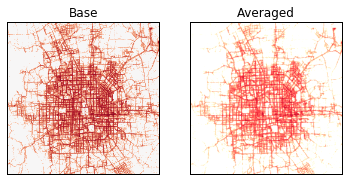

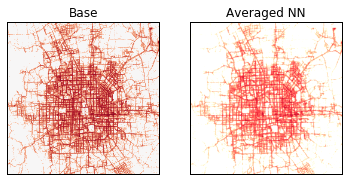

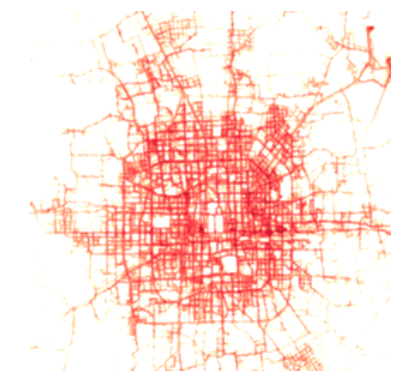

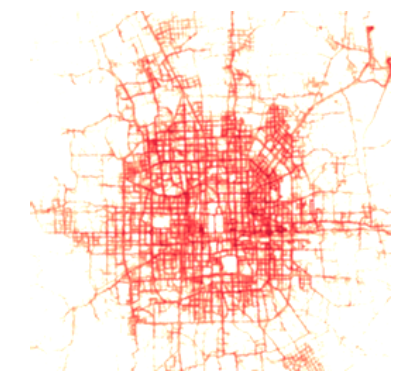

In [109]:
kernel = np.ones((2,2),np.float32)/3
# Changed divide by kernel^2 (ie. denomiator was 4 -> changed to 3)... this value changes brightness of image??
dst = cv2.filter2D(img,-1,kernel)
dstNN = cv2.filter2D(nneg,-1,kernel)

plotComparison(orig, dst, "Averaged")
plotComparison(orig, dstNN, "Averaged NN")
save_256px(dst, 'AVERAGED')
save_256px(dstNN, 'AVERAGED_NN')

# Blur

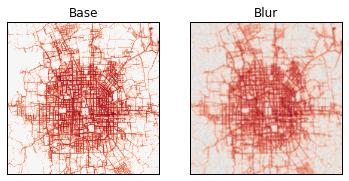

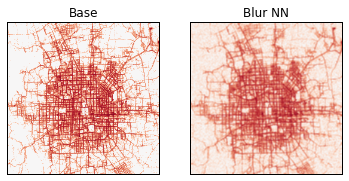

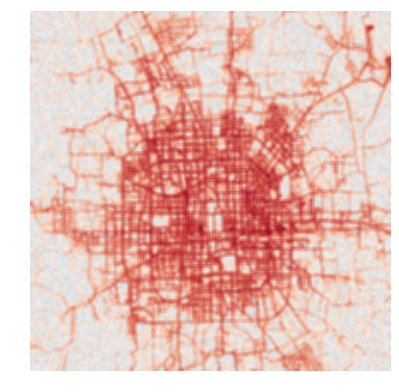

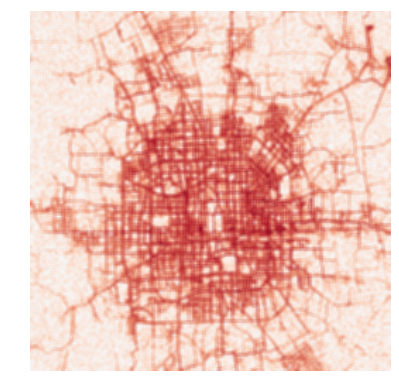

In [98]:
blur = cv2.blur(img,(3,3))
blurNN = cv2.blur(nneg,(3,3))

plotComparison(orig, blur, "Blur")
plotComparison(orig, blurNN, "Blur NN")
save_256px(blur, 'BLURRED')
save_256px(blurNN, 'BLURRED_NN')

# Gaussian Blur

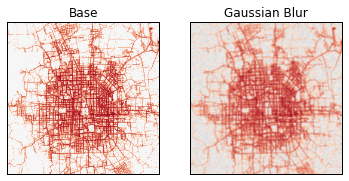

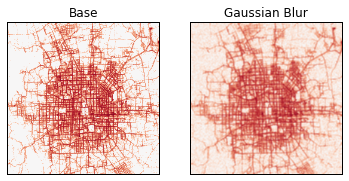

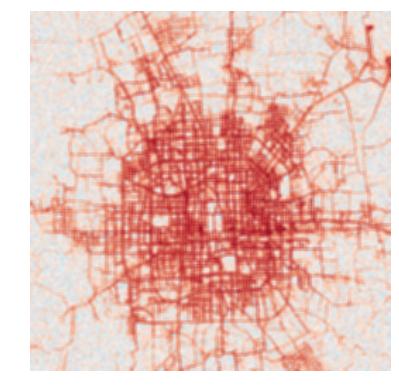

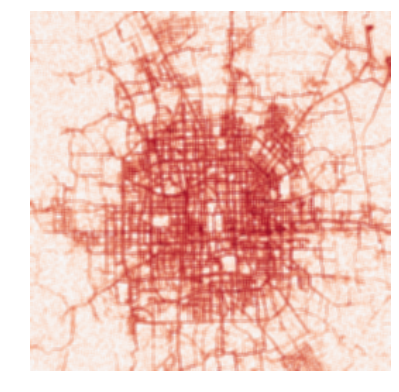

In [120]:
gblur = cv2.GaussianBlur(img,(3,3),10)
gblurNN = cv2.GaussianBlur(nneg,(3,3),10)

plotComparison(orig, gblur, "Gaussian Blur")
plotComparison(orig, gblurNN, "Gaussian Blur")
save_256px(gblur, 'GAUSSIAN_BLURR')
save_256px(gblurNN, 'GAUSSIAN_BLUR_NN')

# Median

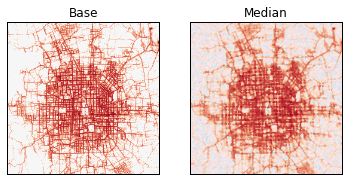

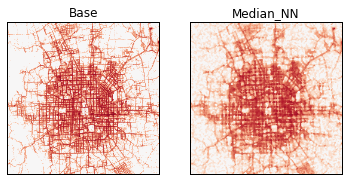

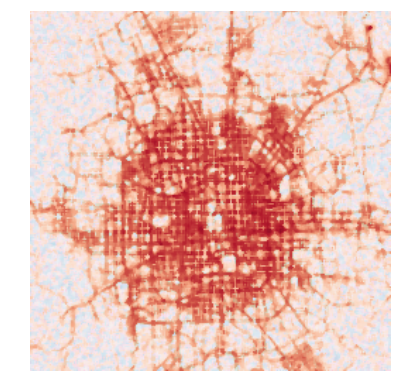

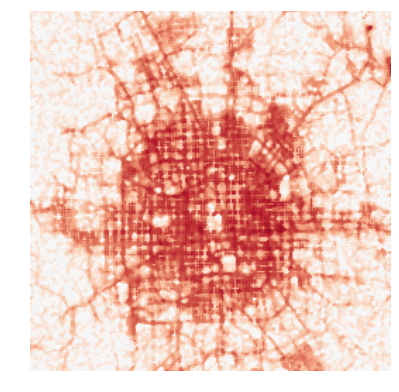

In [102]:
median = cv2.medianBlur(img,3)
medianNN = cv2.medianBlur(nneg,3)

plotComparison(orig, median, "Median")
plotComparison(orig, medianNN, "Median_NN")
save_256px(median, 'MEDIAN')
save_256px(medianNN, 'MEDIAN_NN')

# Bilateral

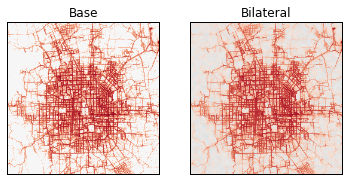

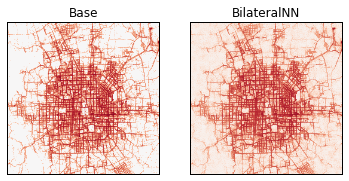

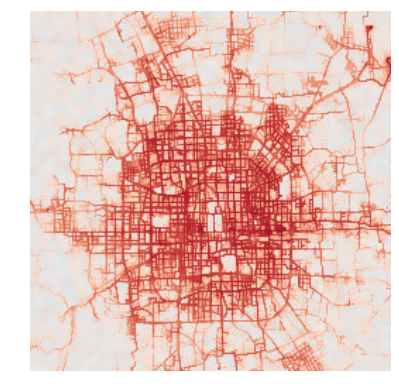

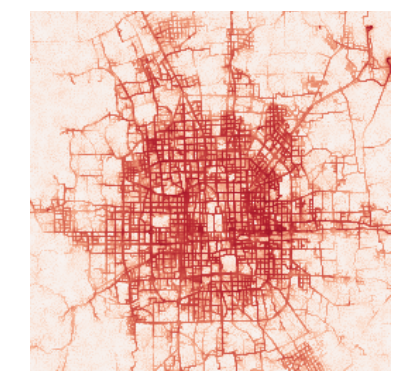

In [113]:
bilateral = cv2.bilateralFilter(img,9,70,70)
bilateralNN = cv2.bilateralFilter(nneg,9,70,70)

plotComparison(orig, bilateral, "Bilateral")
plotComparison(orig, bilateralNN, "BilateralNN")
save_256px(bilateral, 'BILATERAL')
save_256px(bilateralNN, 'BILATERAL_NN')